The purpose of this notebook is to check whether the data collected while the person is being perturbed actually produces different and/or "better" gains than the data collected while the person is not being perturbed.

In [1]:
import sys
sys.path.append('../src')

In [2]:
from gaitanalysis.gait import plot_gait_cycles
from gaitanalysis.controlid import SimpleControlSolver

In [3]:
import utils
from gait_landmark_settings import settings

In [4]:
%matplotlib inline

In [5]:
from IPython.core.pylabtools import figsize
figsize(12, 10)

Load the path to the directory with the experimental data.

In [6]:
trials_dir = utils.config_paths()['raw_data_dir']

Show a table of the currently available trials.

In [7]:
tables = utils.generate_meta_data_tables(trials_dir)
tables['TOP|trial'].sort(['nominal-speed', 'subject-id']).head(50)

No meta file in /home/moorepants/Manuscripts/gait-control-direct-id-paper/raw-data/T002


,belt-speed-standard-deviation-percentage,cortex-version,datetime,dflow-version,id,marker-set,nominal-speed,nominal-speed-units,notes,pitch,stationary-platform,subject-id,sway
022,NaN,3.1.1.1290,2014-02-21,3.16.1,22,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
030,NaN,3.1.1.1290,2014-02-25,3.16.1,30,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
034,NaN,3.1.1.1290,2014-02-27,3.16.1,34,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
043,NaN,3.1.1.1290,2014-03-21,3.16.1,43,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
052,NaN,3.1.1.1290,2014-03-27,3.16.2rc4,52,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
058,NaN,3.1.1.1290,2014-03-28,3.16.2rc4,58,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
064,NaN,3.1.1.1290,2014-04-02,3.16.2rc4,64,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
070,NaN,3.1.1.1290,2014-05-08,3.16.2rc4,70,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
079,NaN,3.1.1.1290,2014-05-13,3.16.2,79,NaN,0.8,meters per second,This is an unloaded trial (no subject) 10 minu...,False,True,0,False
046,NaN,3.1.1.1290,2014-03-21,3.16.1,46,full,0.8,meters per second,This is the trial run for the 10 minute protoc...,False,True,3,False


Trial #68 had nice clean data, so we'll look at that one.

In [8]:
trial_number = '068'

## Gains identified from normal walking

Here I'll extract the data from both the normal walking periods, i.e. the two 1 minute sections at the beginning and end of the trial. Then section out the steps for each and concantenate the steps to give two minutes of data.   

In [9]:
trial = utils.Trial('068')

In [10]:
trial.prep_data('Normal Walking')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-first-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.03 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_section_into_gait_cycles took 0.05 s to execute.
Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-second-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-second-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.0

And identify a controller.

In [11]:
trial.identify_controller('Normal Walking', 'joint isolated')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-first-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.06 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_section_into_gait_cycles took 0.05 s to execute.
Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-second-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-second-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.0

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-first-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.07 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_section_into_gait_cycles took 0.07 s to execute.
Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-second-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-second-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.0

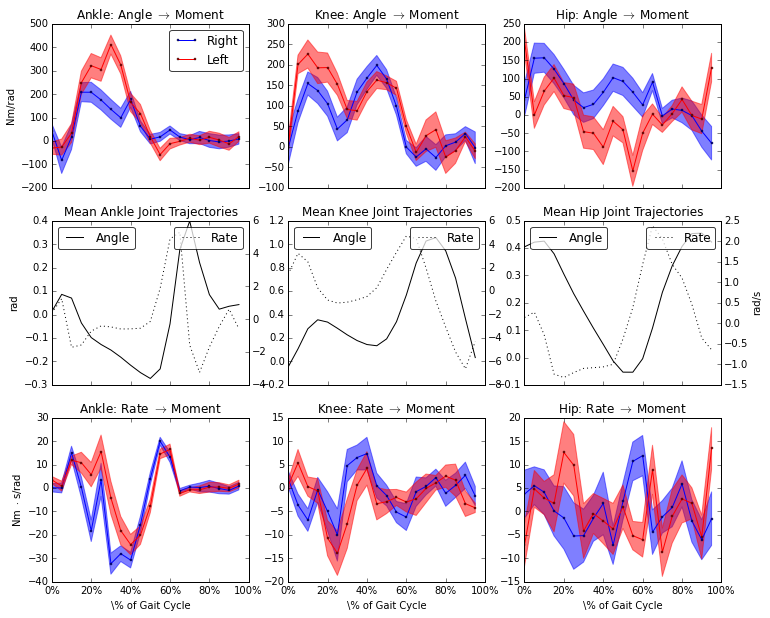

In [12]:
fig, axes = trial.plot_joint_isolated_gains('Normal Walking', 'joint isolated')

## Gains identified from perturbed walking

Now let's see what the perturbed walking gives.

In [13]:
trial.identify_controller('Longitudinal Perturbation', 'joint isolated')

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-longitudinal-perturbation.h5
_write_event_data_frame_to_disk took 0.08 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_write_inverse_dynamics_to_disk took 0.09 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-longitudinal-perturbation.h5.
_section_into_gait_cycles took 0.13 s to execute.
Loading pre-computed gains from:
    /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gains/joint-isolated/068-longitudinal-perturbation.npz
    /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gains/joint-isolated/068-longitudinal-perturbation.h5
identify_controller took 0.35 s to execute.


Generating gain plot.
plot_joint_isolated_gains took 0.95 s to execute.


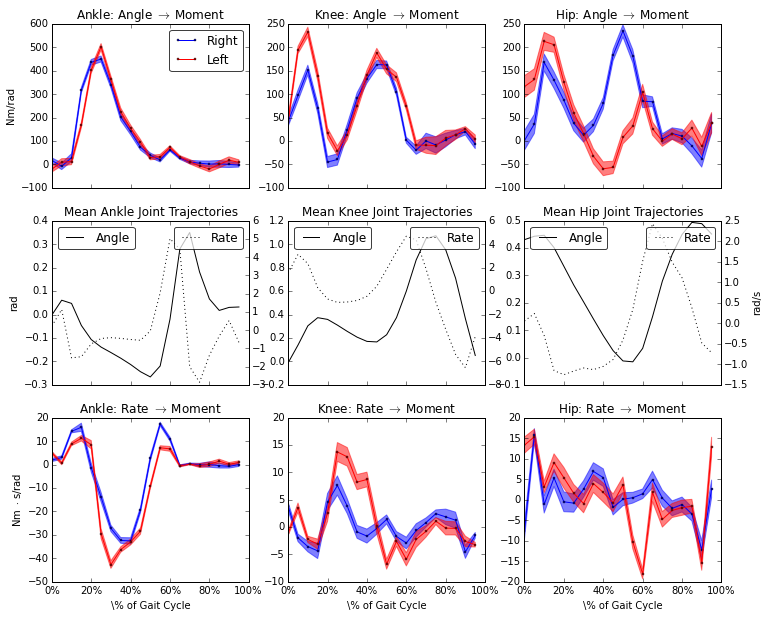

In [14]:
fig, axes = trial.plot_joint_isolated_gains('Longitudinal Perturbation', 'joint isolated')

# Compare Standard Deviations

The difference in the standard deviation of the angles, rates, and torques in the unperturbed gait cycles and the perturbed gait cycles is not that high, especially in the joint angles and rates.

In [15]:
variables = ['FP2.ForY',
             'Right.Ankle.PlantarFlexion.Moment',
             'Right.Knee.Flexion.Rate',
             'Right.Hip.Flexion.Angle']

In [16]:
normal_steps = trial.merge_normal_walking()

Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-first-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.03 s to execute.
Loading pre-computed gait cycles from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-first-normal-walking.h5.
_section_into_gait_cycles took 0.04 s to execute.
Loading pre-cleaned data: /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/cleaned-data/068-second-normal-walking.h5
_write_event_data_frame_to_disk took 0.02 s to execute.
Loading pre-computed inverse dynamics from /home/moorepants/Manuscripts/gait-control-direct-id-paper/processed-data/gait-data/068-second-normal-walking.h5.
_write_inverse_dynamics_to_disk took 0.0

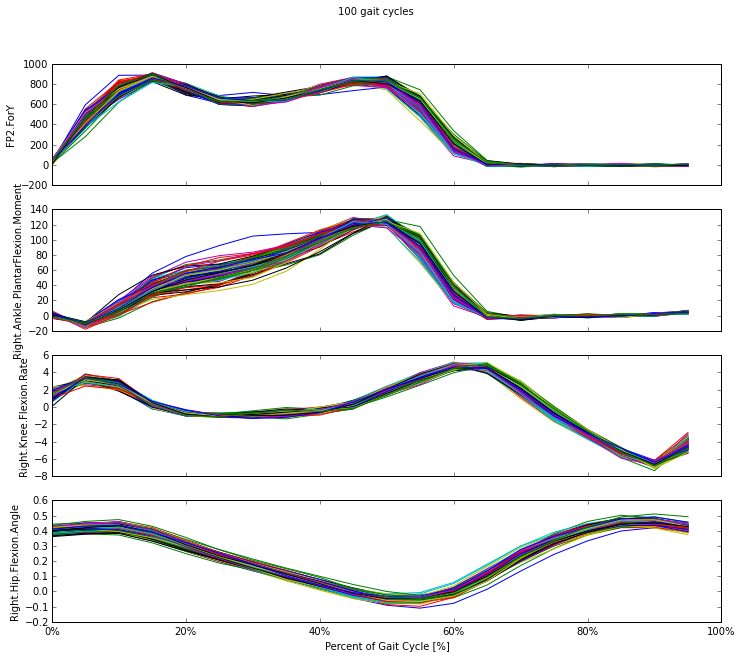

In [17]:
axes = plot_gait_cycles(normal_steps, *variables, mean=False, marker='.')

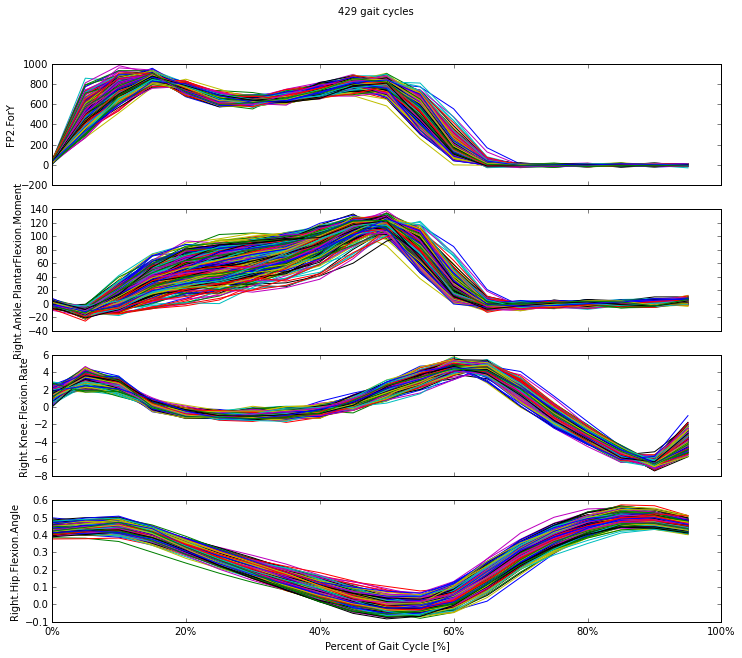

In [18]:
perturbed_steps = trial.gait_data_objs['Longitudinal Perturbation'].gait_cycles
axes = plot_gait_cycles(perturbed_steps, *variables, marker='.')

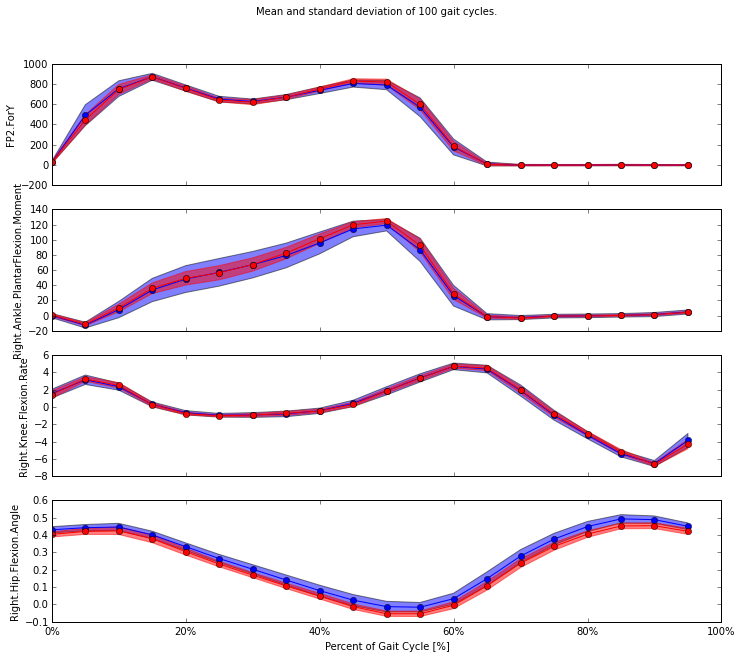

In [19]:
axes = plot_gait_cycles(perturbed_steps, *variables, mean=True)
axes = plot_gait_cycles(normal_steps, *variables, axes=axes, mean=True, color='red')

In [20]:
std_normal = normal_steps.std(axis='items')
std_perturbed = perturbed_steps.std(axis='items')

In [21]:
mean_normal = normal_steps.mean(axis='items')
mean_perturbed = perturbed_steps.mean(axis='items')

This should give a relative percent difference in the standard deviation of the perturbed with respect to the unperturbed

In [22]:
(100 * (std_perturbed - std_normal) / mean_normal)[variables]

,FP2.ForY,Right.Ankle.PlantarFlexion.Moment,Right.Knee.Flexion.Rate,Right.Hip.Flexion.Angle
0.00,-2.066890,224.034693,5.405025,0.681677
0.05,11.633972,-16.053312,8.642453,0.211594
0.10,3.765172,57.226910,4.084188,-0.093768
0.15,1.441026,23.094227,21.855695,-0.499541
0.20,0.538244,17.887177,-12.237496,0.674709
0.25,1.618355,15.722947,-10.242481,3.262460
0.30,-0.319288,12.887726,-10.646299,6.791152
0.35,0.680297,10.566337,-13.706098,12.577626
0.40,1.753496,8.135879,-24.872085,30.760464
0.45,1.734578,5.308980,42.953876,-130.823479


This is the mean difference in the standard deviations across the gait cycle.

In [23]:
(std_perturbed - std_normal)[variables].mean()

FP2.ForY                             11.689851
Right.Ankle.PlantarFlexion.Moment     4.717311
Right.Knee.Flexion.Rate               0.149321
Right.Hip.Flexion.Angle               0.008341
dtype: float64

# Footer

In [24]:
!git rev-parse HEAD

6af0c229bb0a9edf78f8489d5f0efe02d5685a57


In [25]:
!git --git-dir=/home/moorepants/src/GaitAnalysisToolKit/.git --work-tree=/home/moorepants/src/GaitAnalysisToolKit rev-parse HEAD

9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c


In [26]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Installed version_information.py. To use it, type:
  %load_ext version_information


In [27]:
%load_ext version_information

In [28]:
%version_information numpy, scipy, pandas, matplotlib, tables, oct2py, dtk, gaitanalysis

Software,Version
Python,2.7.9 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython,3.0.0
OS,Linux 3.13.0 49 generic x86_64 with debian jessie sid
numpy,1.9.2
scipy,0.15.1
pandas,0.16.0
matplotlib,1.4.2
tables,3.1.1
oct2py,3.1.0
dtk,0.4.0


In [29]:
!conda list

# packages in environment at /home/moorepants/anaconda/envs/gait-direct-id-paper:
#
backports.ssl-match-hostname 3.4.0.2                   <pip>
cairo                     1.12.18                       0  
dateutil                  2.4.1                    py27_0  
dynamicisttoolkit         0.4.0                    py27_0  
fastcache                 1.0.2                    py27_0  
fontconfig                2.11.1                        2  
freetype                  2.4.10                        0  
gaitanalysistoolkit (/home/moorepants/src/GaitAnalysisToolKit) 0.2.0.dev0                <pip>
hdf5                      1.8.14                        0  
ipython                   3.0.0                    py27_0  
ipython-notebook          3.0.0                    py27_1  
jinja2                    2.7.3                    py27_1  
jsonschema                2.4.0                    py27_0  
libpng                    1.5.13                        1  
libsodium                 0.4.5         

In [30]:
!pip freeze

backports.ssl-match-hostname==3.4.0.2
DynamicistToolKit==0.4.0
fastcache==1.0.2
-e git+git@github.com:csu-hmc/GaitAnalysisToolKit.git@9e80dfdcfe0a14b44e0ebcbadb6e9e827d215c3c#egg=GaitAnalysisToolKit-origin_speedup-inverse-dynamics
ipython==3.0.0
Jinja2==2.7.3
jsonschema==2.4.0
MarkupSafe==0.23
matplotlib==1.4.2
mistune==0.5.1
nose==1.3.4
numexpr==2.3.1
numpy==1.9.2
oct2py==3.1.0
pandas==0.16.0
ptyprocess==0.4
Pygments==2.0.2
pyparsing==2.0.1
PySide==1.2.1
python-dateutil==2.4.2
pytz==2015.2
PyYAML==3.11
pyzmq==14.5.0
scipy==0.15.1
seaborn==0.5.1
six==1.9.0
snakeviz==0.3.1
sympy==0.7.6
tables==3.1.1
terminado==0.5
tornado==4.1
